# Машинное обучение
## Лабораторная работа №3

Выполнил студент группы 15-В-2   
Брызгалов Роман
Вариант №16

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import (cross_val_score, StratifiedKFold,
                                     train_test_split)

from scipy.stats import pearsonr, spearmanr

### 1) Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

Набор данных содержит информацию о работе электростанции

| Переменная   | Описание  | Параметр  | 
|--------------|--------------|-------------------|
|AT|средняя температура| вещественный|
|V|отработка|вещественный|
|AP|давление окружающей среды|вещественный|
|RH|относительная влажность|вещественный|
|PE|произведенная электроэнергия|вещественный|

Нужно предсказать количество произведенной энергии

In [2]:
# изменим набор для того, чтобы считать его
import codecs


fileName = 'Folds.txt'
newFileName = 'FoldsNew.txt'

with codecs.open(fileName, 'r', encoding='utf-8', errors='ignore') as file:
    newLines = []
    lines = file.readlines()
    for i, line in enumerate(lines):
        newLines.append(line.replace('\t', ','))
        
with codecs.open(newFileName, 'w', encoding='utf-8', errors='ignore') as file:
    file.writelines(newLines)

In [3]:
df = pd.read_csv(newFileName)
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [4]:
print('dataset size: ', df.shape)
df.count()

dataset size:  (9568, 5)


AT    9568
V     9568
AP    9568
RH    9568
PE    9568
dtype: int64

### 2) Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции

In [5]:
print('dataset size before reduce: ', df.shape)

df = df.drop_duplicates()
df = df.dropna().reset_index(drop=True)
print('dataset size: ', df.shape)

dataset size before reduce:  (9568, 5)
dataset size:  (9527, 5)


### 3) Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию)

In [6]:
# выделим категориальные и числовые(количественные) признаки
numerical_columns = [i for i in df.columns if df[i].dtype.name != 'object']
categorial_columns = [i for i in df.columns if df[i].dtype.name == 'object']

print('numerical: ', numerical_columns)
print('categorial: ', categorial_columns)

numerical:  ['AT', 'V', 'AP', 'RH', 'PE']
categorial:  []


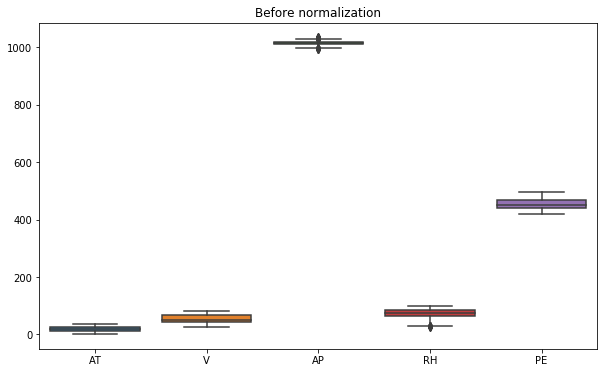

In [7]:
# выводим boxplot-ы до нормализации
plt.figure(figsize=(10,6))
sns.boxplot(data=df[numerical_columns])
plt.title("Before normalization")
plt.show()

In [8]:
# масштабируем
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

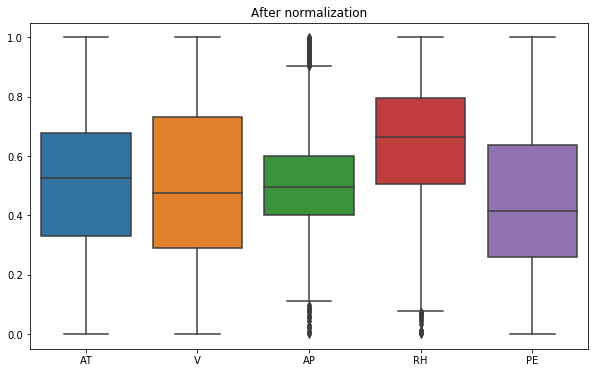

In [9]:
# выводим boxplot-ы после нормализации
plt.figure(figsize=(10,6))
sns.boxplot(data=df[numerical_columns])
plt.title("After normalization")
plt.show()

### 4)	Выполните замену категориальных признаков; выберите и обоснуйте способ замены

In [10]:
print('list of categorial columns: ', categorial_columns)

list of categorial columns:  []


В наборе нет категориальных признаков

### 5) Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других

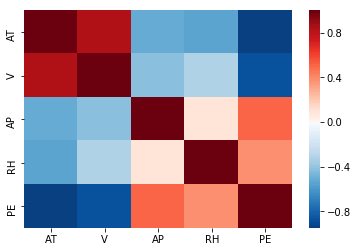

In [11]:
df_corr = df.corr()
colors = sns.color_palette("Blues_r", n_colors=100)
colors += sns.color_palette("Reds", n_colors=100)
sns.heatmap(df_corr, cmap=colors, center=0)
plt.show()

In [12]:
df_corr

,AT,V,AP,RH,PE
AT,1.000000,0.843689,-0.508222,-0.543947,-0.947908
V,0.843689,1.000000,-0.415718,-0.312214,-0.869900
AP,-0.508222,-0.415718,1.000000,0.101631,0.518687
RH,-0.543947,-0.312214,0.101631,1.000000,0.391175
PE,-0.947908,-0.869900,0.518687,0.391175,1.000000


### 6) Заполните пропущенные значения в данных

In [13]:
print('dataset size: ', df.shape)
df.count()

dataset size:  (9527, 5)


AT    9527
V     9527
AP    9527
RH    9527
PE    9527
dtype: int64

### 7)	Решите поставленную задачу регрессии в соответствии с заданием
 * Линейная регрессия без использования регуляризаторов
 * Линейная регрессия, RIDGE регуляризатор

In [14]:
# разделим полученные данные на данные для обучения и теста
X, y = df.drop('PE', axis=1), df['PE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1898)

**Линейная регрессия без использования регуляризаторов**

In [15]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
pred_regr = regr.predict(X_test)
print(pred_regr[:10] - y_test[:10])

3633    0.022473
609     0.005416
5080   -0.000433
3922   -0.089124
7857   -0.079764
1737   -0.000449
3178    0.095205
7382   -0.024015
5404    0.035196
1726    0.034247
Name: PE, dtype: float64


In [16]:
corr = {}
corr['pearson'], _ = pearsonr(pred_regr, y_test)
corr['spearman'], _ = spearmanr(pred_regr, y_test)
print('pearson correlation: ', corr['pearson'])
print('spearmen correlation: ', corr['spearman'])

pearson correlation:  0.964578417566
spearmen correlation:  0.963777316562


**Линейная регрессия, RIDGE регуляризатор**

In [17]:
regr = linear_model.Ridge()
params = {'alpha': np.arange(0.5 , 1, 0.01)}
regr_grid = GridSearchCV(regr, params)
regr_grid.fit(X_train, y_train)
best_alpha = regr_grid.best_estimator_.alpha
print('best alpha:', best_alpha)

best alpha: 0.5


In [18]:
regr = linear_model.Ridge(alpha=best_alpha)
regr.fit(X_train,y_train)
pred_regr = regr.predict(X_test)
print(pred_regr[:10] - y_test[:10])

3633    0.023190
609     0.005981
5080   -0.000603
3922   -0.089440
7857   -0.080322
1737    0.000672
3178    0.095458
7382   -0.023612
5404    0.035030
1726    0.034135
Name: PE, dtype: float64


In [19]:
corr = {}
corr['pearson'], _ = pearsonr(pred_regr, y_test)
corr['spearman'], _ = spearmanr(pred_regr, y_test)
print('pearson correlation: ', corr['pearson'])
print('spearmen correlation: ', corr['spearman'])

pearson correlation:  0.964590444645
spearmen correlation:  0.963855108963
